In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Training data read
opt_train = pd.read_csv('optdigits.tra',header=None)

In [3]:
opt_train.head() # showing the training data head

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [4]:
# Function to add regularization in cost calculation
def regularize(reg_param, theta, l):
    weight = np.square(theta)
    weight = np.sum(theta)
    weight = reg_param*weight
    return weight/(2*l)

In [5]:
# hypothesis function - returns prediction
def hypothesis(theta, X):
    z = np.dot(X, theta)
    return 1/(1+np.exp(-(z))) # sigmoid calculation

In [6]:
# To calculate the error - cost function
def cost(X, y, theta, reg_param):
    y1 = hypothesis(theta, X)
    return ((-(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1)))+regularize(reg_param,theta, len(X)))

In [7]:
X= pd.concat([pd.Series(1, index=opt_train.index, name='00'), opt_train.iloc[:,:64]], axis=1)

In [8]:
y = opt_train.iloc[:,64]

In [9]:
y.unique() # all the classes present

array([0, 7, 4, 6, 2, 5, 8, 1, 9, 3])

In [10]:
y1 = np.zeros([opt_train.shape[0], len(y.unique())])
y1 = pd.DataFrame(y1)

In [11]:
for i in range(0, len(y.unique())):
    for j in range(0, len(y1)):
        if y[j] == y.unique()[i]:
            y1.iloc[j, i] = 1
        else: 
            y1.iloc[j, i] = 0
y1.head() # 1 hot encoded

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# function for gradient descent - alpha (learning rate), 
# reg_param (regularization parameter), epochs (no of iterations)
# returns optimized theta
def gradient_descent(X, y, theta, alpha, epochs,reg_param):
    m = len(X)
    X = X.to_numpy(dtype='float128')
    X = pd.DataFrame(X)
    for i in range(0, epochs):
        for j in range(0, 10):
            theta = pd.DataFrame(theta)
            # calculating predictions
            h = hypothesis(theta.iloc[:,j], X)
            for k in range(0, theta.shape[0]):
                #updating theta
                theta.iloc[k, j] -= alpha*((reg_param/m)*theta.iloc[k, j]+((1/m)* np.sum((h-y.iloc[:, j])*X.iloc[:, k])))
            theta = pd.DataFrame(theta)
    return theta

In [13]:
# 1. calculating weights (theta) without regularization parameter (reg_param=0)
# no of iterations chosen = 100
# learning rate 0.02
theta = np.zeros([X.shape[1], y1.shape[1]], dtype='float128')
theta = gradient_descent(X, y1, theta, 0.02, 100,reg_param=0)

In [14]:
theta.shape

(65, 10)

In [15]:
X.shape

(3823, 65)

In [16]:
# predicting output and computing training error
output = []
cost_list=[]
for i in range(0, 10):
    theta1 = pd.DataFrame(theta)
    h = hypothesis(theta1.iloc[:,i], X)
    cst = cost(X,y1.iloc[:, i],theta1.iloc[:,i],reg_param=0)
    output.append(h)
    cost_list.append(abs(cst))
output=pd.DataFrame(output)

In [17]:
output

,0,1,2,3,4,5,6,7,8,9,...,3813,3814,3815,3816,3817,3818,3819,3820,3821,3822
0,9.801421e-01,9.974570e-01,0.000194,0.000415,0.048823,0.000108,0.050179,0.003269,0.863145,0.000317,...,0.273924,0.003959,0.012808,0.000271,0.024784,0.022697,2.898723e-02,8.041134e-04,0.004518,0.000389
1,3.714335e-05,9.543595e-06,0.996702,0.002934,0.000005,0.000015,0.000561,0.000115,0.000222,0.000012,...,0.001211,0.003354,0.000008,0.000383,0.000053,0.001036,1.313646e-03,8.499708e-06,0.000005,0.989812
2,9.635947e-03,3.235366e-03,0.005762,0.313275,0.012023,0.000044,0.032320,0.001702,0.015958,0.000339,...,0.996544,0.007664,0.000005,0.000013,0.000095,0.000293,9.991171e-01,9.956169e-02,0.012550,0.007144
3,1.278006e-03,2.384522e-04,0.000047,0.000002,0.909664,0.000016,0.000004,0.000026,0.000070,0.021734,...,0.041906,0.000063,0.000109,0.000004,0.000073,0.000691,7.974308e-02,9.714537e-01,0.994288,0.000005
4,1.105951e-03,3.932455e-03,0.001372,0.000006,0.000422,0.678311,0.000162,0.000448,0.000124,0.000093,...,0.001852,0.010088,0.013013,0.008128,0.012129,0.001368,1.068181e-04,1.594038e-04,0.002954,0.000864
5,4.203992e-02,9.538182e-04,0.000056,0.026336,0.159534,0.001425,0.235538,0.961848,0.429575,0.005877,...,0.006534,0.000061,0.001885,0.068877,0.055251,0.014944,1.853629e-03,8.283574e-04,0.001545,0.001645
6,4.209877e-02,6.685117e-04,0.001680,0.047686,0.142656,0.000059,0.001056,0.008026,0.000171,0.184603,...,0.000422,0.764712,0.012709,0.000139,0.047659,0.031326,1.336275e-03,6.623605e-02,0.002979,0.000444
7,6.401261e-07,3.316930e-08,0.000271,0.135172,0.000117,0.003861,0.054500,0.026109,0.000001,0.003300,...,0.000310,0.235283,0.000045,0.001515,0.001330,0.000013,9.646413e-03,3.093644e-04,0.000002,0.000494
8,1.981562e-02,1.178970e-02,0.000213,0.731998,0.000750,0.060110,0.913917,0.334099,0.000843,0.000962,...,0.000020,0.011138,0.731094,0.005628,0.975997,0.986535,1.840129e-06,5.972493e-07,0.000002,0.093027
9,2.163745e-04,1.712205e-04,0.000839,0.000018,0.000362,0.000155,0.000106,0.002751,0.000018,0.000769,...,0.000001,0.000001,0.001878,0.976590,0.033493,0.032873,2.991920e-07,7.625160e-05,0.000019,0.097882


In [18]:
cost_list

[0.014801402033700875234,
 0.017657235701162956372,
 0.030844211679009549334,
 0.019518808221721333372,
 0.027644845435902441556,
 0.03411383536482606007,
 0.09009417581251169763,
 0.062570135209355535293,
 0.082670589113625207095,
 0.0392396741456732489]

In [45]:
# calculating the accuracy on training data
class_list=[0,0,0,0,0,0,0,0,0,0]
for u in range(y.shape[0]):
    class_list[y[u]]+=1
pred_list=[0,0,0,0,0,0,0,0,0,0]
accuracy = 0
for col in range(0, 10):
    for row in range(len(y1)):
        if y1.iloc[row, col] == 1 and output.iloc[col, row] >= 0.5:
            accuracy += 1
            pred_list[col]+=1
acc_list=[]
for u in range(10):
    acc_list.append(pred_list[u]*100/class_list[u])
print("no of entries for each class")
print(class_list)
print("no of right prediction for each class")
print(pred_list)
print("percentage of correct prediction for each class")
print(acc_list)
train_err_list=[]
for u in range(len(acc_list)):
    train_err_list.append(100-acc_list[u])
print("training error for each class in %")
print(train_err_list)
accuracy = accuracy/len(X)

no of entries for each class
[376, 389, 380, 389, 387, 376, 377, 387, 380, 382]
no of right prediction for each class
[368, 375, 358, 366, 360, 349, 307, 339, 313, 357]
percentage of correct prediction for each class
[97.87234042553192, 96.40102827763496, 94.21052631578948, 94.08740359897172, 93.02325581395348, 92.81914893617021, 81.43236074270557, 87.59689922480621, 82.36842105263158, 93.45549738219896]
training error for each class in %
[2.1276595744680833, 3.598971722365036, 5.78947368421052, 5.912596401028281, 6.976744186046517, 7.180851063829792, 18.56763925729443, 12.403100775193792, 17.631578947368425, 6.544502617801044]


In [28]:
print(accuracy) # avg accuracy of training 

0.9134187810619931


In [29]:
theta # the optimized theta we got after training

,0,1,2,3,4,5,6,7,8,9
0,-0.004624,-0.002724,-0.001323,-0.003980,-0.003156,-0.003105,-0.012970,-0.011154,-0.006924,-0.004276
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.005358,0.003643,-0.002654,-0.007899,0.003804,-0.000979,-0.018251,-0.015658,-0.007109,0.008604
3,-0.035885,0.009700,-0.031514,-0.082350,0.032649,0.050607,-0.108668,-0.072629,-0.032330,0.009923
4,-0.017527,-0.013714,-0.112049,-0.047031,0.001788,0.006501,-0.059387,-0.053151,-0.000680,-0.009047
...,...,...,...,...,...,...,...,...,...,...
60,-0.009296,-0.065523,-0.116556,-0.049082,0.004739,0.035498,-0.010249,-0.082478,-0.023962,0.025845
61,-0.024606,-0.171349,-0.064290,0.004656,0.014161,-0.040425,-0.018759,-0.051908,-0.021504,0.013214
62,-0.063098,-0.102550,-0.110573,0.083985,0.088518,-0.060681,-0.088281,0.043554,-0.040312,-0.039784
63,-0.048538,-0.031958,-0.048198,0.020569,0.123429,-0.038474,-0.068390,-0.018806,-0.026929,-0.075165


In [30]:
# reading test data
df_test = pd.read_csv('optdigits.tes',header=None)
df_test_feat = df_test.iloc[:,:64]
df_test_out = df_test.iloc[:,64]
X_test= pd.concat([pd.Series(1, index=df_test_feat.index, name='00'), df_test_feat], axis=1)
y_test = np.zeros([df_test_out.shape[0], len(df_test_out.unique())])
y_test = pd.DataFrame(y_test)            

In [31]:
for i in range(0, len(df_test_out.unique())):
    for j in range(0, len(y_test)):
        if df_test_out[j] == df_test_out.unique()[i]:
            y_test.iloc[j, i] = 1
        else: 
            y_test.iloc[j, i] = 0
y_test.head()
#preparing test data

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X_test.shape

(1797, 65)

In [33]:
y_test.shape

(1797, 10)

In [34]:
# predicting output and computing test error
output_test = []
cost_test =[]
for i in range(0, 10):
    theta1 = pd.DataFrame(theta)
    h = hypothesis(theta1.iloc[:,i], X_test)
    cst = cost(X_test,y_test.iloc[:, i],theta1.iloc[:,i],reg_param=0)
    output_test.append(h)
    cost_test.append(abs(cst))
output_test=pd.DataFrame(output_test)

In [35]:
output_test

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
0,9.924354e-01,6.982024e-07,0.000459,0.000088,0.009096,0.000753,0.001083,0.000035,0.000341,0.010524,...,0.001958,6.119043e-03,0.000043,0.000008,1.524805e-03,0.011322,9.526245e-01,0.000068,0.013350,0.000143
1,1.542702e-04,7.425269e-04,0.002730,0.000188,0.001906,0.000003,0.000003,0.990806,0.000086,0.000130,...,0.000005,3.135320e-04,0.000623,0.004404,6.516866e-04,0.000039,1.410438e-05,0.000015,0.000033,0.000005
2,2.628176e-03,7.504537e-03,0.000592,0.000030,0.995801,0.000103,0.031177,0.016397,0.000119,0.000840,...,0.009288,9.969255e-01,0.003389,0.003411,9.973793e-01,0.000095,9.182113e-04,0.016474,0.000647,0.002044
3,4.293137e-04,3.067248e-04,0.001872,0.001001,0.049447,0.000013,0.890591,0.000055,0.000812,0.000091,...,0.000728,1.805603e-02,0.000153,0.000047,1.611867e-02,0.000010,2.802311e-04,0.001974,0.000111,0.007154
4,1.334759e-03,1.167886e-03,0.375483,0.007033,0.000030,0.000151,0.000672,0.002060,0.002379,0.000118,...,0.000036,5.173811e-06,0.008161,0.023315,5.748544e-06,0.000066,3.290963e-04,0.000535,0.000065,0.000490
5,1.196153e-02,6.621131e-04,0.000002,0.121416,0.000091,0.014741,0.006314,0.002843,0.000027,0.008672,...,0.845222,1.037400e-04,0.000025,0.000005,8.799744e-05,0.018027,2.225992e-03,0.000005,0.001503,0.000034
6,1.118866e-02,1.542032e-02,0.162465,0.002173,0.013355,0.001513,0.055968,0.003529,0.976551,0.004061,...,0.001299,5.663010e-04,0.616013,0.096273,1.484730e-03,0.049795,2.066547e-04,0.959605,0.029050,0.539301
7,8.782808e-07,9.982649e-01,0.461243,0.019814,0.046129,0.129840,0.053897,0.005195,0.000971,0.004075,...,0.000312,1.296940e-02,0.252830,0.726510,3.288044e-03,0.000286,2.345074e-07,0.149087,0.000948,0.001140
8,9.400780e-02,1.267978e-04,0.000016,0.006461,0.000023,0.328184,0.000002,0.003450,0.001314,0.849600,...,0.046028,2.205143e-06,0.000009,0.000075,5.954294e-06,0.959720,1.606514e-04,0.000041,0.907401,0.000339
9,6.461856e-04,6.863944e-04,0.000018,0.978065,0.000111,0.175712,0.000013,0.000531,0.005907,0.004287,...,0.003486,6.344543e-07,0.000687,0.017807,1.737959e-07,0.013714,3.547978e-06,0.000051,0.003183,0.001857


In [46]:
#calculating accuracy on test data using previously obtained theta
# accuracy_test = 0
# for col in range(0, 10):
#     for row in range(len(y_test)):
#         if y_test.iloc[row, col] == 1 and output_test.iloc[col, row] >= 0.5:
#             accuracy_test += 1
# accuracy_test = accuracy_test/len(X_test)



class_list_test=[0,0,0,0,0,0,0,0,0,0]
for u in range(df_test_out.shape[0]):
    class_list_test[df_test_out[u]]+=1
pred_list_test=[0,0,0,0,0,0,0,0,0,0]
accuracy_test = 0
for col in range(0, 10):
    for row in range(len(y_test)):
        if y_test.iloc[row, col] == 1 and output_test.iloc[col, row] >= 0.5:
            accuracy_test += 1
            pred_list_test[col]+=1
acc_list_test=[]
for u in range(10):
    acc_list_test.append(pred_list_test[u]*100/class_list_test[u])
print("no of entries for each class")
print(class_list_test)
print("no of right prediction for each class")
print(pred_list_test)
print("percentage of correct prediction for each class")
print(acc_list_test)
test_err_list=[]
for u in range(len(acc_list_test)):
    test_err_list.append(100-acc_list_test[u])
print("test error for each class in %")
print(test_err_list)
accuracy_test = accuracy_test/len(X_test)

no of entries for each class
[178, 182, 177, 183, 181, 182, 181, 179, 174, 180]
no of right prediction for each class
[174, 1, 0, 0, 0, 174, 0, 1, 0, 1]
percentage of correct prediction for each class
[97.75280898876404, 0.5494505494505495, 0.0, 0.0, 0.0, 95.6043956043956, 0.0, 0.5586592178770949, 0.0, 0.5555555555555556]
test error for each class in %
[2.247191011235955, 99.45054945054945, 100.0, 100.0, 100.0, 4.395604395604394, 100.0, 99.44134078212291, 100.0, 99.44444444444444]


In [40]:
accuracy_test # test accuracy

0.19532554257095158

In [41]:
cost_test

[0.014622540741368786402,
 1.0247511057541115017,
 1.4650061284269654717,
 1.4121623293517904182,
 1.4239908186674444586,
 0.040194875684903713614,
 0.6770545836762073491,
 1.0138694249896863227,
 0.82115893094652924817,
 0.76501406048656862813]

Text(0.5, 1.0, 'Test and Training Errors Combined')

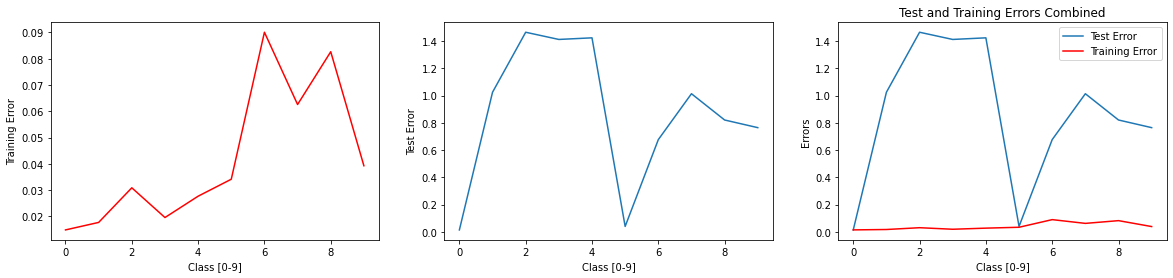

In [55]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.plot(range(0,10),cost_list,'r')
plt.xlabel('Class [0-9]')
plt.ylabel('Training Error')
plt.subplot(1,3,2)
plt.plot(range(0,10),cost_test)
plt.xlabel('Class [0-9]')
plt.ylabel('Test Error')
plt.subplot(1,3,3)
plt.plot(range(0,10),cost_test)
plt.plot(range(0,10),cost_list,'r')
plt.xlabel('Class [0-9]')
plt.legend(["Test Error", "Training Error"], loc ="upper right")
plt.ylabel('Errors')
plt.title('Test and Training Errors Combined')

In [48]:
# 2.) Running the algorithm for 5 different regularization parameters
reg_ind=[10,500,1000,1500,2000] # chosen regularization parameters
theta_list=[] #stores theta values
for j in range(len(reg_ind)):
    theta = np.zeros([X.shape[1], y1.shape[1]], dtype='float128')
    theta = gradient_descent(X, y1, theta, 0.02, 100,reg_param=reg_ind[j])
    theta_list.append(theta)

In [49]:
# calculate accuracy
def get_accuracy(y,out,x):
    acc = 0
    for col in range(0, 10):
        for row in range(len(y)):
            if y.iloc[row, col] == 1 and out.iloc[col, row] >= 0.5:
                acc += 1
    acc = acc*100/len(x)
    return acc

In [51]:
# computing avg training error for models using five different regularization parameters
cost_list_tr=[]
accuracy_list_tr=[]
training_error_list=[]
for j in range(len(reg_ind)):
    ct =0
    out_tr=[]
    theta1 = pd.DataFrame(theta_list[j])
    for i in range(0, 10):
        cst = cost(X,y1.iloc[:, i],theta1.iloc[:,i],reg_ind[j])
        ct+=abs(cst)
        h = hypothesis(theta1.iloc[:,i], X)
        out_tr.append(h)
    out_tr=pd.DataFrame(out_tr)
    accuracy_list_tr.append(get_accuracy(y1,out_tr,X))
    ct=ct/10
    cost_list_tr.append(ct)
print("accuracy of models (training) in %")
print(accuracy_list_tr)
for u in range(len(accuracy_list_tr)):
    training_error_list.append(100-accuracy_list_tr[u])
print("training error for models in % ")
print(training_error_list)
print("cost ")
print(cost_list_tr)

accuracy of models (training) in %
[91.34187810619932, 91.39419304211353, 87.41825791263406, 89.72011509285902, 88.30761182317552]
training error for models in % 
[8.658121893800683, 8.605806957886472, 12.581742087365939, 10.279884907140982, 11.69238817682448]
cost 
[0.040837146695786431604, 0.023843929858707221865, 0.04535576088961623761, 0.073373370571553525394, 0.10149471143560085406]


In [52]:
# computing avg test error for models using five different regularization parameters
cost_list_test=[]
accuracy_list_test=[]
test_error_list=[]
for j in range(len(reg_ind)):
    ct =0
    out_test=[]
    theta1 = pd.DataFrame(theta_list[j])
    for i in range(0, 10):
        cst = abs(cost(X_test,y_test.iloc[:, i],theta1.iloc[:,i],reg_ind[j]))
        h = hypothesis(theta1.iloc[:,i], X_test)
        ct+=cst
        out_test.append(h)
    out_test = pd.DataFrame(out_test)
    accuracy_list_test.append(get_accuracy(y_test,out_test,X_test))
    ct=ct/10
    cost_list_test.append(ct)
print("accuracy of models (training) in %")
print(accuracy_list_test)
for u in range(len(accuracy_list_test)):
    test_error_list.append(100-accuracy_list_test[u])
print("test erros for models in % ")
print(test_error_list)
print("cost ")
print(cost_list_test)

accuracy of models (training) in %
[19.532554257095157, 19.532554257095157, 19.421257651641625, 19.532554257095157, 19.532554257095157]
test erros for models in % 
[80.46744574290484, 80.46744574290484, 80.57874234835838, 80.46744574290484, 80.46744574290484]
cost 
[0.861324829716324531, 0.7064510370653764231, 0.5916279362821255859, 0.51118692324373028274, 0.435410922454783989]


Text(0.5, 1.0, 'Test and Training Errors Combined')

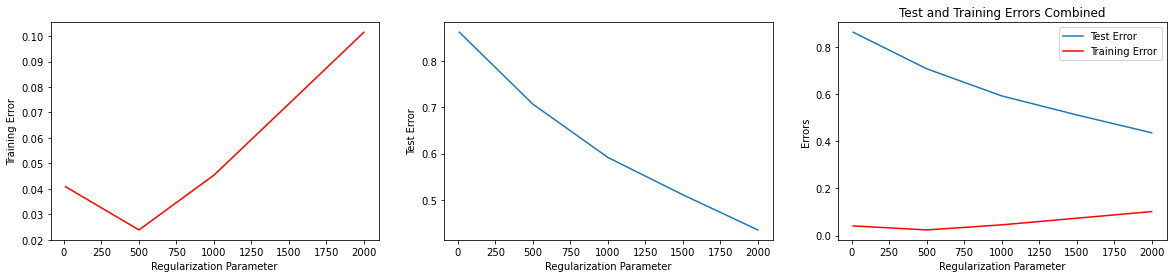

In [54]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.plot(reg_ind,cost_list_tr,'r')
plt.xlabel('Regularization Parameter')
plt.ylabel('Training Error')
plt.subplot(1,3,2)
plt.plot(reg_ind,cost_list_test)
plt.xlabel('Regularization Parameter')
plt.ylabel('Test Error')
plt.subplot(1,3,3)
plt.plot(reg_ind,cost_list_test)
plt.plot(reg_ind,cost_list_tr,'r')
plt.xlabel('Regularization Parameter')
plt.legend(["Test Error", "Training Error"], loc ="upper right")
plt.ylabel('Errors')
plt.title('Test and Training Errors Combined')